In [234]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

In [235]:
data = pd.read_csv('./relevant_data/wrangled_data.csv')

In [236]:
data.head()

,state,county,density_km,days_counted,case_count_20_days,death_count_20_days,confirmed_infection(%_of_pop),death_perc(%_of_case),avg_daily_case_increase(%_of_pop),case_count_20_days(%_of_pop),...,percent_enrolled_in_free_or_reduced_lunch,segregation_index_2,average_traffic_volume_per_meter_of_major_roadways,percent_homeowners,percent_severe_housing_cost_burden,percent_less_than_18_years_of_age,percent_65_and_over,percent_not_proficient_in_english,percent_female,percent_rural
0,Alabama,Autauga,35.436,37,19,1,0.076964,9.523810,0.002080,0.034817,...,43.408673,23.628395,88.457040,74.894625,13.403481,23.674035,15.562670,0.820225,51.448715,42.002162
1,Alabama,Baldwin,44.261,47,25,1,0.095465,1.724138,0.002031,0.013716,...,48.486565,31.825343,86.997430,73.619343,11.725808,21.607911,20.443350,0.543517,51.538377,42.279099
2,Alabama,Barbour,11.979,27,29,0,0.142040,2.564103,0.005261,0.105620,...,63.292302,23.449713,102.291762,61.397779,14.059546,20.867328,19.420441,1.631683,47.216752,67.789635
3,Alabama,Bibb,14.215,31,26,0,0.183286,0.000000,0.005912,0.113463,...,61.562116,52.600206,29.335580,75.073099,9.886874,20.477679,16.473214,0.268210,46.781250,68.352607
4,Alabama,Blount,34.325,36,15,0,0.064548,0.000000,0.001793,0.026168,...,52.906287,17.694495,33.411782,78.626214,8.462257,23.153527,18.236515,1.724520,50.726141,89.951502


In [237]:
data.columns

Index(['state', 'county', 'density_km', 'days_counted', 'case_count_20_days',
       'death_count_20_days', 'confirmed_infection(%_of_pop)',
       'death_perc(%_of_case)', 'avg_daily_case_increase(%_of_pop)',
       'case_count_20_days(%_of_pop)', 'death_count_20_days(%_of_case)',
       'percent_fair_or_poor_health', 'percent_low_birthweight',
       'percent_smokers', 'percent_adults_with_obesity',
       'food_environment_index', 'percent_physically_inactive',
       'percent_with_access_to_exercise_opportunities',
       'percent_excessive_drinking',
       'percent_driving_deaths_with_alcohol_involvement', 'teen_birth_rate',
       'percent_uninsured', 'primary_care_physicians_rate', 'dentist_rate',
       'mental_health_provider_rate', 'preventable_hospitalization_rate',
       'percent_with_annual_mammogram', 'percent_vaccinated',
       'high_school_graduation_rate', 'percent_some_college', 'labor_force',
       'percent_unemployed', 'percent_children_in_poverty',
       '80th

In [238]:
excluded_columns = [
    'state', 
    'county', 
    'density_km', 
    'days_counted', 
    'case_count_20_days',
    'death_count_20_days', 
    'confirmed_infection(%_of_pop)',
    'death_perc(%_of_case)', 
    'avg_daily_case_increase(%_of_pop)',
    'case_count_20_days(%_of_pop)', 
    'death_count_20_days(%_of_case)',
    'presence_of_water_violation'
]

In [239]:
data_subset = data[excluded_columns]

In [240]:
main_data = data.drop(excluded_columns, axis=1)

In [241]:
main_data.columns

Index(['percent_fair_or_poor_health', 'percent_low_birthweight',
       'percent_smokers', 'percent_adults_with_obesity',
       'food_environment_index', 'percent_physically_inactive',
       'percent_with_access_to_exercise_opportunities',
       'percent_excessive_drinking',
       'percent_driving_deaths_with_alcohol_involvement', 'teen_birth_rate',
       'percent_uninsured', 'primary_care_physicians_rate', 'dentist_rate',
       'mental_health_provider_rate', 'preventable_hospitalization_rate',
       'percent_with_annual_mammogram', 'percent_vaccinated',
       'high_school_graduation_rate', 'percent_some_college', 'labor_force',
       'percent_unemployed', 'percent_children_in_poverty',
       '80th_percentile_income', '20th_percentile_income',
       'percent_single_parent_households', 'social_association_rate',
       'annual_average_violent_crimes', 'violent_crime_rate',
       'injury_death_rate', 'average_daily_pm2_5',
       'percent_severe_housing_problems', 'severe_hou

In [242]:
chi_square_value, p_value = calculate_bartlett_sphericity(main_data)

In [243]:
chi_square_value, p_value

(154505.74379110342, 0.0)

In [244]:
kmo_all, kmo_model = calculate_kmo(main_data)

In [245]:
kmo_model

0.8834397303905585

In [246]:
main_data.shape

(2081, 58)

In [247]:
fa = FactorAnalyzer()
fa.set_params(n_factors=25, rotation='varimax')
fa.fit(main_data)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=25, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [248]:
ev, v = fa.get_eigenvalues()

In [249]:
ev[:25]

array([16.93598012,  7.0963575 ,  4.54093054,  3.318744  ,  2.50413139,
        1.8378551 ,  1.58220296,  1.42673323,  1.26048358,  1.15590325,
        1.13173621,  0.97535507,  0.91944423,  0.85725435,  0.78429932,
        0.74637968,  0.69293807,  0.64661724,  0.62958434,  0.60650253,
        0.55560148,  0.52705651,  0.50464513,  0.47391224,  0.45475819])

In [250]:
ev[25:]

array([4.21951195e-01, 4.16821247e-01, 3.92208729e-01, 3.81823708e-01,
       3.45383799e-01, 3.21558337e-01, 3.10925694e-01, 3.05124721e-01,
       2.96547964e-01, 2.63262128e-01, 2.48223219e-01, 2.40864373e-01,
       2.20909623e-01, 2.00976469e-01, 1.93057786e-01, 1.68596475e-01,
       1.54006002e-01, 1.46122482e-01, 1.28935992e-01, 1.04067520e-01,
       1.00662748e-01, 9.08917830e-02, 7.75820144e-02, 7.43763974e-02,
       5.30044631e-02, 5.22724549e-02, 4.85868866e-02, 2.87845263e-02,
       2.34062689e-02, 1.88613739e-02, 3.94383984e-03, 4.89188448e-04,
       3.64334256e-04])

In [251]:
fa.loadings_.shape

(58, 25)

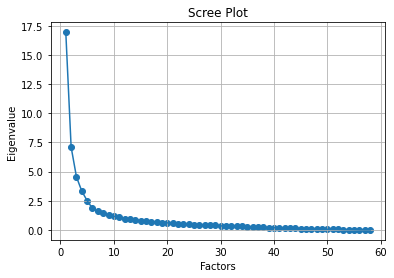

In [252]:
# Create scree plot using matplotlib
plt.scatter(range(1, main_data.shape[1]+1), ev)
plt.plot(range(1, main_data.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [253]:
fa = FactorAnalyzer()
fa.set_params(n_factors=11, rotation='varimax')
fa.fit(main_data)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=11, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [254]:
factor_df = pd.DataFrame(fa.loadings_)

In [255]:
factor_df.index = main_data.columns

In [256]:
factor_df

,0,1,2,3,4,5,6,7,8,9,10
percent_fair_or_poor_health,0.866495,0.141182,0.161890,-0.071366,-0.020305,0.121316,0.241402,0.039059,0.146585,0.059649,-0.031953
percent_low_birthweight,0.643051,0.194750,0.067716,-0.027414,0.036232,0.053511,-0.161308,0.222171,0.075618,0.120032,0.308514
percent_smokers,0.849424,-0.066690,-0.131667,-0.007519,-0.073720,0.109972,-0.143889,-0.040703,0.010997,-0.010802,-0.105910
percent_adults_with_obesity,0.590889,-0.219965,-0.071858,-0.237586,-0.109941,0.120690,-0.015413,0.142953,0.001504,-0.171559,0.020501
food_environment_index,-0.649069,-0.227191,-0.135363,-0.051128,0.005559,-0.057548,0.083838,0.015522,-0.717544,0.040426,-0.120393
percent_physically_inactive,0.715240,-0.175265,0.117416,-0.238856,-0.062340,0.001743,-0.056237,0.136480,-0.017319,-0.056324,-0.066900
percent_with_access_to_exercise_opportunities,-0.496991,0.160111,-0.157902,0.409627,0.157152,0.065953,0.097748,0.135524,0.003607,-0.008987,0.130878
percent_excessive_drinking,-0.631056,-0.022643,-0.249763,0.043570,0.070174,0.197771,-0.071512,-0.179236,-0.100141,-0.175028,-0.011160
percent_driving_deaths_with_alcohol_involvement,-0.041289,0.016725,-0.145360,0.003944,-0.019119,-0.056241,-0.021480,-0.132690,0.031490,0.006422,0.136134
teen_birth_rate,0.758754,-0.189212,0.300156,-0.001044,-0.022044,0.126663,0.255731,-0.104397,0.045848,-0.012343,0.165165


Notes:

0. Poor well-being both physically and mentally
1. Shelter issue severity 
2. Lack of insurance
3. Availability to health/wellness facilities
4. Crime/Labour force
5. How young the population is
6. Overpopulation
7. Not sure - percent_female, percent_drive_alone_to_work, average_daily_pm2_5
8. Poor food index
9. Income
10. Children related

In [257]:
main_data_transformed = pd.DataFrame(fa.transform(main_data))

In [258]:
data = pd.concat([data_subset, main_data_transformed], axis=1)

In [259]:
data.corr(method='pearson')['confirmed_infection(%_of_pop)']

density_km                           0.237127
days_counted                         0.197210
case_count_20_days                   0.525854
death_count_20_days                  0.338915
confirmed_infection(%_of_pop)        1.000000
death_perc(%_of_case)                0.034654
avg_daily_case_increase(%_of_pop)    0.947294
case_count_20_days(%_of_pop)         0.583616
death_count_20_days(%_of_case)      -0.022082
0                                   -0.036461
1                                    0.188039
2                                   -0.000806
3                                    0.000131
4                                    0.064600
5                                    0.096526
6                                    0.078038
7                                    0.122219
8                                   -0.001625
9                                    0.091097
10                                   0.074713
Name: confirmed_infection(%_of_pop), dtype: float64

In [260]:
state_data = data[data['state'] == 'Nevada']

In [261]:
state_data.corr(method='pearson')['case_count_20_days(%_of_pop)']

density_km                          -0.362356
days_counted                        -0.429993
case_count_20_days                  -0.159110
death_count_20_days                 -0.043966
confirmed_infection(%_of_pop)        0.551770
death_perc(%_of_case)                0.242296
avg_daily_case_increase(%_of_pop)    0.841446
case_count_20_days(%_of_pop)         1.000000
death_count_20_days(%_of_case)       0.185188
0                                    0.079610
1                                   -0.476369
2                                    0.597635
3                                    0.132922
4                                   -0.216860
5                                    0.285766
6                                    0.182295
7                                   -0.444290
8                                   -0.371263
9                                    0.609061
10                                   0.038616
Name: case_count_20_days(%_of_pop), dtype: float64